In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
file_path = '../../data/Prac2/vidu4_lin_reg.txt'

df = pd.read_csv(file_path, sep=' ')
df.head()

,ID,TUOI,BMI,HA,GLUCOSE,CHOLESTEROL,BEDAYNTM
0,1,56,21,160,14.0,6.00,1.95
1,2,76,18,150,12.0,4.97,1.33
2,3,63,16,160,4.4,6.39,0.83
3,4,78,20,100,4.0,7.00,2.00
4,5,87,20,110,4.6,4.10,1.30


In [9]:
df = df.drop('ID', axis='columns')
df.head()

,TUOI,BMI,HA,GLUCOSE,CHOLESTEROL,BEDAYNTM
0,56,21,160,14.0,6.00,1.95
1,76,18,150,12.0,4.97,1.33
2,63,16,160,4.4,6.39,0.83
3,78,20,100,4.0,7.00,2.00
4,87,20,110,4.6,4.10,1.30


In [15]:
df['TYPE_2'] = df['BEDAYNTM'].apply(lambda x: 1 if x > 1 else 0)
df.head()

,TUOI,BMI,HA,GLUCOSE,CHOLESTEROL,BEDAYNTM,TYPE_2
0,56,21,160,14.0,6.00,1.95,1
1,76,18,150,12.0,4.97,1.33,1
2,63,16,160,4.4,6.39,0.83,0
3,78,20,100,4.0,7.00,2.00,1
4,87,20,110,4.6,4.10,1.30,1


In [16]:
df1 = df.drop('BEDAYNTM', axis='columns')
df1.head()

,TUOI,BMI,HA,GLUCOSE,CHOLESTEROL,TYPE_2
0,56,21,160,14.0,6.00,1
1,76,18,150,12.0,4.97,1
2,63,16,160,4.4,6.39,0
3,78,20,100,4.0,7.00,1
4,87,20,110,4.6,4.10,1


In [17]:
X = df1.drop('TYPE_2', axis='columns')
y = df1['TYPE_2']

X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
model.score(X_test, y_test)

0.55

Text(45.722222222222214, 0.5, 'y_pred')

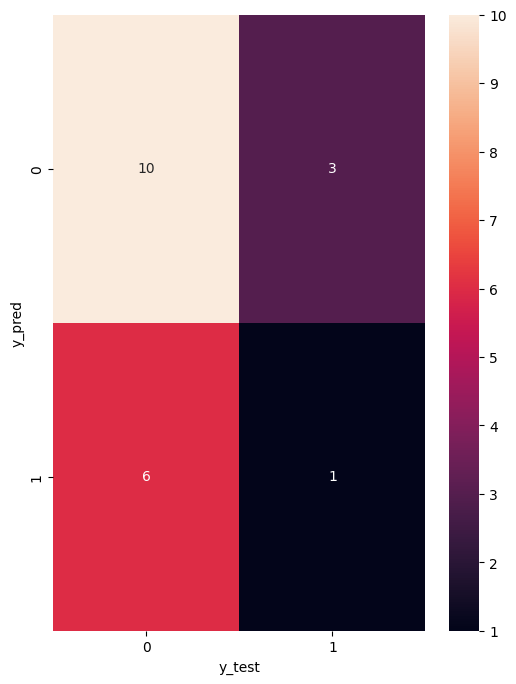

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 8))
sns.heatmap(cm, annot=True)
plt.xlabel("y_test")
plt.ylabel('y_pred')



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.55
0.25
0.14285714285714285
